In [117]:
# DATA LOADING

from utils.data_loader.mobility_data_loader import mobility_data_loader 

# Process whole dataset in to intermediate form
dataframe = mobility_data_loader('20240101','20240131')

1
20240101 dataframe shape
(85653, 18)
2
20240102 dataframe shape
(84857, 18)
3
20240103 dataframe shape
(85335, 18)
4
20240104 dataframe shape
(101273, 18)
5
20240105 dataframe shape
(113529, 18)
6
20240106 dataframe shape
(104928, 18)
7
20240107 dataframe shape
(94203, 18)
8
20240108 dataframe shape
(91534, 18)
9
20240109 dataframe shape
(115631, 18)
10
20240110 dataframe shape
(115583, 18)
11
20240111 dataframe shape
(117350, 18)
12
20240112 dataframe shape
(119567, 18)
13
20240113 dataframe shape
(106789, 18)
14
20240114 dataframe shape
(99355, 18)
15
20240115 dataframe shape
(114665, 18)
16
20240116 dataframe shape
(115293, 18)
17
20240117 dataframe shape
(119302, 18)
18
20240118 dataframe shape
(115119, 18)
19
20240119 dataframe shape
(122319, 18)
20
20240120 dataframe shape
(110519, 18)
21
20240121 dataframe shape
(95166, 18)
22
20240122 dataframe shape
(117317, 18)
23
20240123 dataframe shape
(114325, 18)
24
20240124 dataframe shape
(111372, 18)
25
20240125 dataframe shape
(114

In [118]:
import pandas as pd
parent = []

for date,df in dataframe.items():
    print(date,df.shape)
    parent.append(df)
print(len(parent))
parent_df = pd.concat(parent,ignore_index=True)
print(parent_df.shape)

20240101 (85653, 25)
20240102 (84857, 25)
20240103 (85335, 25)
20240104 (101273, 25)
20240105 (113529, 25)
20240106 (104928, 25)
20240107 (94203, 25)
20240108 (91534, 25)
20240109 (115631, 25)
20240110 (115583, 25)
20240111 (117350, 25)
20240112 (119567, 25)
20240113 (106789, 25)
20240114 (99355, 25)
20240115 (114665, 25)
20240116 (115293, 25)
20240117 (119302, 25)
20240118 (115119, 25)
20240119 (122319, 25)
20240120 (110519, 25)
20240121 (95166, 25)
20240122 (117317, 25)
20240123 (114325, 25)
20240124 (111372, 25)
20240125 (114876, 25)
20240126 (121748, 25)
20240127 (113147, 25)
20240128 (99002, 25)
20240129 (117013, 25)
20240130 (118667, 25)
20240131 (117670, 25)
31
(3373107, 25)


In [119]:
# # Get residents list
# import pandas as pd

# residents_list_df = pd.read_csv('E:\\IRP_noto_earthquake\\data\\processed\\residents_common_ids_Jan1_10.csv')
# residents_list_df.shape

In [120]:
# # Keep residents rows only in df
# df_residents = df[df['common_id'].isin(residents_list_df['common_id'])]

# print(df_residents.shape)

In [121]:
df = parent_df

In [122]:
from utils.resident.resident_classification import keep_resident_travels_in_df
df = keep_resident_travels_in_df(df)
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_19964\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_19964\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_19964\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



(38381, 25)

In [123]:
import pandas as pd
# Filter data that only was after earthquake time

earthquake_time = pd.to_datetime('2024-01-01 16:10:00')

# Keep travels that only are after the earthquake
df = df[(df['depart_time_o'] > earthquake_time)]
df.shape

(37639, 25)

In [124]:
df.common_id.nunique()

902

In [125]:
display(df.head())

,common_id,mesh_o,latitude_o,longitude_o,arrive_time_o,stay_time_o,depart_time_o,move_time,mode,mesh_d,...,poi_home,poi_work,purpose_flg,latitude_h,longitude_h,latitude_w,longitude_w,distance_oh,distance_dh,distance_od
45,001de71e-04b1-447a-a637-e045aee10c23,55364738131,37.027978,136.975557,2024-01-01 16:36:07,73,2024-01-01 17:49:22,23,walk,55364738134,...,5.536476e+10,NaN,6,37.043458,136.966438,<NA>,<NA>,1.902138,1.885995,0.23
152,0074cea7e45281ddc54de84b92756143,56360772313,37.397662,136.901326,2024-01-01 16:46:59,83,2024-01-01 18:10:19,801,car,56360772131,...,5.636077e+10,5.636077e+10,6,37.394292,136.901438,37.394292,136.901438,0,0.012412,0.39
221,00a0a8847001f885782f7e55b57861ad,55364601234,37.003311,136.771556,2023-12-31 13:54:50,1678,2024-01-01 17:52:22,9,walk,55364601234,...,5.536460e+10,5.536460e+10,6,37.001875,136.766312,37.001875,136.766312,0,0,0.02
230,00a7eb7b743c5e4bcce8b28721c6bf48,55370061341,36.723370,137.017039,2024-01-01 19:34:24,22,2024-01-01 19:56:21,264,car,55364759134,...,5.536476e+10,5.536476e+10,5,37.043542,136.966313,37.043542,136.966313,35.886214,2.061265,35.84
361,01115f3a53ec4b347b8e65b6ac070563,55364725444,37.024873,136.948808,2024-01-01 09:26:28,459,2024-01-01 17:05:15,30,car,55364725443,...,5.536476e+10,NaN,3,37.045042,136.940188,<NA>,<NA>,2.369594,2.387377,0.11


In [129]:
import pandas as pd
import numpy as np

# Assuming df is already defined and loaded
# Create residents_df
unique_ids = df['common_id'].unique()
residents_df = pd.DataFrame({
    'common_id': unique_ids,
    'evacuated_on': [np.nan] * len(unique_ids),
    'returned_on': [np.nan] * len(unique_ids),
    'evacuated_days': [np.nan] * len(unique_ids),
    'displacement': [np.nan] * len(unique_ids),
    'home_city': [np.nan] * len(unique_ids)
})

# Function to update residents_df based on conditions
def update_residents(df, residents_df):
    for common_id in residents_df['common_id']:
        user_rows = df[df['common_id'] == common_id].sort_values(by='arrive_time_o')
        
        evacuated_on = None
        displacement = None
        returned_on = None
        
        for index, row in user_rows.iterrows():
            if evacuated_on is None and row['mesh_d'] != row['poi_home'] and row['stay_time_o'] >= 360:
                evacuated_on = row['arrive_time_o']
                displacement = row['distance_dh']
                
            if evacuated_on is not None and row['mesh_d'] == row['poi_home']:
                returned_on = row['arrive_time_o']
                break
        
        if evacuated_on is not None:
            residents_df.loc[residents_df['common_id'] == common_id, 'evacuated_on'] = evacuated_on
            residents_df.loc[residents_df['common_id'] == common_id, 'displacement'] = displacement
            
            if returned_on is not None:
                residents_df.loc[residents_df['common_id'] == common_id, 'returned_on'] = returned_on
                evacuated_days = (pd.to_datetime(returned_on) - pd.to_datetime(evacuated_on)).days
                residents_df.loc[residents_df['common_id'] == common_id, 'evacuated_days'] = evacuated_days
            else:
                residents_df.loc[residents_df['common_id'] == common_id, 'evacuated_days'] = 31

update_residents(df, residents_df)



C:\Users\HP\AppData\Local\Temp\ipykernel_19964\3007100602.py:35: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-01-01 18:12:43' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\HP\AppData\Local\Temp\ipykernel_19964\3007100602.py:39: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-01-02 16:30:55' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [130]:
residents_df['displacement'] = residents_df['displacement'].fillna(0)
residents_df['evacuated_days'] = residents_df['evacuated_days'].fillna(0)

In [131]:
display(residents_df)

,common_id,evacuated_on,returned_on,evacuated_days,displacement,home_city
0,001de71e-04b1-447a-a637-e045aee10c23,2024-01-01 18:12:43,2024-01-02 16:30:55,0.0,1.249963,NaN
1,0074cea7e45281ddc54de84b92756143,2024-01-02 07:32:13,2024-01-28 18:51:01,26.0,0.051031,NaN
2,00a0a8847001f885782f7e55b57861ad,2024-01-02 07:41:54,2024-01-04 09:42:43,2.0,0.572605,NaN
3,00a7eb7b743c5e4bcce8b28721c6bf48,2024-01-02 20:26:43,2024-01-04 09:59:44,1.0,7.696617,NaN
4,01115f3a53ec4b347b8e65b6ac070563,2024-01-01 09:26:28,2024-01-04 20:53:45,3.0,2.387377,NaN
...,...,...,...,...,...,...
897,357cba5bf609a8f506d0271b40c1f400,2024-01-11 22:52:50,2024-01-31 18:05:45,19.0,0.652594,NaN
898,92e25500bdf41331eb0f73287119b8da,2024-01-30 17:56:08,2024-01-31 10:33:39,0.0,2.101481,NaN
899,afacb924966ab86145e35577156aa90f,NaN,NaN,0.0,0.000000,NaN
900,c7d12eab39ae4cde67e852d53b90f42b,NaN,NaN,0.0,0.000000,NaN


In [152]:
check_time = pd.to_datetime('2024-01-14 00:00:00')

evacuated_in_first_three_days = residents_df[residents_df.evacuated_on < check_time]
evacuated_in_first_three_days.shape

(707, 6)

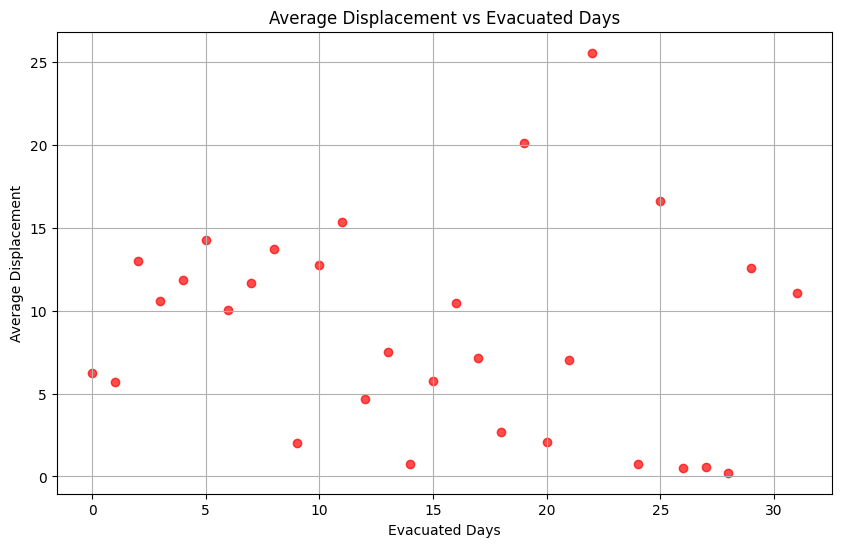

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming residents_df is already defined and populated

# Group by 'evacuated_days' and calculate the mean 'displacement'
grouped_df = evacuated_in_first_three_days.groupby('evacuated_days')['displacement'].mean().reset_index()

# Plot the results as a red scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['evacuated_days'], grouped_df['displacement'], color='red', alpha=0.7)
plt.title('Average Displacement vs Evacuated Days')
plt.xlabel('Evacuated Days')
plt.ylabel('Average Displacement')
plt.grid(True)
plt.show()


In [161]:
display(df.head())


,common_id,mesh_o,latitude_o,longitude_o,arrive_time_o,stay_time_o,depart_time_o,move_time,mode,mesh_d,...,poi_home,poi_work,purpose_flg,latitude_h,longitude_h,latitude_w,longitude_w,distance_oh,distance_dh,distance_od
45,001de71e-04b1-447a-a637-e045aee10c23,55364738131,37.027978,136.975557,2024-01-01 16:36:07,73,2024-01-01 17:49:22,23,walk,55364738134,...,5.536476e+10,NaN,6,37.043458,136.966438,<NA>,<NA>,1.902138,1.885995,0.23
152,0074cea7e45281ddc54de84b92756143,56360772313,37.397662,136.901326,2024-01-01 16:46:59,83,2024-01-01 18:10:19,801,car,56360772131,...,5.636077e+10,5.636077e+10,6,37.394292,136.901438,37.394292,136.901438,0,0.012412,0.39
221,00a0a8847001f885782f7e55b57861ad,55364601234,37.003311,136.771556,2023-12-31 13:54:50,1678,2024-01-01 17:52:22,9,walk,55364601234,...,5.536460e+10,5.536460e+10,6,37.001875,136.766312,37.001875,136.766312,0,0,0.02
230,00a7eb7b743c5e4bcce8b28721c6bf48,55370061341,36.723370,137.017039,2024-01-01 19:34:24,22,2024-01-01 19:56:21,264,car,55364759134,...,5.536476e+10,5.536476e+10,5,37.043542,136.966313,37.043542,136.966313,35.886214,2.061265,35.84
361,01115f3a53ec4b347b8e65b6ac070563,55364725444,37.024873,136.948808,2024-01-01 09:26:28,459,2024-01-01 17:05:15,30,car,55364725443,...,5.536476e+10,NaN,3,37.045042,136.940188,<NA>,<NA>,2.369594,2.387377,0.11


In [162]:
# Get City of Resident
unique_df = df.drop_duplicates(subset=['common_id'])
unique_df.shape

(902, 25)

In [ ]:
import geopandas as gpd
import folium


# Replace 'path_to_your_shapefile.shp' with the actual path to your shapefile
jpn_adm2 = gpd.read_file('E:\\IRP_noto_earthquake\\data\\raw\\jpn_adm\\jpn_adm_2019_shp\\jpn_admbnda_adm2_2019.shp')
jpn_adm2.crs = 'EPSG:3857'

# Filter specific administrative units
jpn_adm2 = jpn_adm2[
    (jpn_adm2['ADM2_EN'] == 'Suzu City') |
    (jpn_adm2['ADM2_EN'] == 'Anamizu-machi') |
    (jpn_adm2['ADM2_EN'] == 'Noto-cho') |
    (jpn_adm2['ADM2_EN'] == 'Wajima City') |
    (jpn_adm2['ADM2_EN'] == 'Shika-machi') |
    (jpn_adm2['ADM2_EN'] == 'Nanao City')
]



In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming df contains your data with 'longitude_h' and 'latitude_h' columns

# Create GeoDataFrame for home locations
geometry_home = [Point(xy) for xy in zip(df['longitude_h'], df['latitude_h'])]
gdf_home = gpd.GeoDataFrame(df, geometry=geometry_home, crs='EPSG:4326')  # Use appropriate CRS

# Assuming jpn_adm2 is your GeoDataFrame with city boundaries
# Filter jpn_adm2 to cities of interest
cities_of_interest = ['Suzu City', 'Anamizu-machi', 'Noto-cho', 'Wajima City', 'Shika-machi', 'Nanao City']
jpn_adm2_filtered = jpn_adm2[jpn_adm2['ADM2_EN'].isin(cities_of_interest)]

# Spatial join to find which city each point belongs to
joined = gpd.sjoin(gdf_home, jpn_adm2_filtered, how='left', op='within')

# Extract city names where the points are located inside the cities
city_names = joined['ADM2_EN'].tolist()

# Add city_names to your original DataFrame (df)
df['city_name'] = city_names

# Now df['city_name'] will contain the city names where each home location is located
